In [1]:
from osrs_GE import *
import GE_object
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
df_CTI = read_CTI_master_file('24h')
df_CTI.head()

timestamp  avgHighPrice  avgLowPrice  highPriceVolume  \
id date                                                                 
2  2023-09-04  1693785600           158      153.000         25448193   
   2023-09-05  1693872000           157      152.000         20442989   
   2023-09-06  1693958400           155      151.000         18166461   
   2023-09-07  1694044800           154      151.000         19839631   
   2023-09-08  1694131200           153      150.000         19325295   

               lowPriceVolume  
id date                        
2  2023-09-04         7792403  
   2023-09-05         7067147  
   2023-09-06         7738376  
   2023-09-07         6687883  
   2023-09-08         7420479

In [3]:
check(df_CTI)[0]

timestamp  avgHighPrice  avgLowPrice  highPriceVolume  \
id   date                                                                 
1779 2024-04-14  1713052800             1        0.000          4782387   
7936 2024-04-03  1712102400             1        0.000         92224230   
     2024-05-04  1714780800             1        0.000        156057008   
     2024-07-14  1720915200             1        0.000         96610687   
     2024-09-07  1725667200             1        0.000         82634241   
     2024-09-08  1725753600             1        0.000         97020187   
     2024-09-11  1726012800             1        0.000         95224109   

                 lowPriceVolume  
id   date                        
1779 2024-04-14               0  
7936 2024-04-03               0  
     2024-05-04               0  
     2024-07-14               0  
     2024-09-07               0  
     2024-09-08               0  
     2024-09-11               0

In [4]:
for idx,new_df in check(df_CTI)[0].groupby(level=0):
    print(idx, item_name_from_id(idx))

1779 Flax
7936 Pure essence


- pure essence can just set the price to 1 or just exclude because that never moves, same with the flax
- cowhide/rune armor set - can impute with a interpolated value from surrounding days or look at average price difference between high and low for the year

In [5]:
to_check = check(df_CTI)[0]
for idx in to_check.index:
    if idx[0] in (1779,7936):
        df_CTI.loc[(idx[0],idx[1]),'avgLowPrice'] = 1

## Exploring

In [6]:
df_CTI.groupby("id")[['avgHighPrice','avgLowPrice','highPriceVolume','lowPriceVolume']].mean()

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume
id,,,,
2,190.385,185.688,"21,899,327.288","8,273,884.345"
225,495.400,487.805,"351,673.535","593,374.983"
231,387.877,382.467,"892,944.275","823,355.390"
263,"3,615.230","3,590.345","41,701.967","109,947.320"
377,95.007,93.608,"582,496.715","827,466.828"
385,819.455,811.322,"2,703,837.473","1,607,167.245"
444,175.773,174.102,"5,510,606.412","8,638,173.705"
453,164.065,161.702,"10,255,911.180","15,681,284.232"
536,"3,306.385","3,273.495","1,116,232.970","1,288,577.208"


In [7]:
df_CTI[df_CTI['avgHighPrice'] < df_CTI['avgLowPrice']].shape

(531, 5)

- this occurs when volume buys and/or sells aggressively past the last trade price
- flipping opportunity?
- could also represent some large intraday volatility

In [8]:
df_CTI.index.unique(level='id').shape

(27,)

In [9]:
df_CTI = compute_VWAP(df_CTI)

In [10]:
df_index

,name,id
0,Coal,453
1,Steel bar,2353
2,Gold ore,444
3,Nature rune,561
4,Death rune,560
5,Pure essence,7936
6,Yew logs,1515
7,Magic logs,1513
8,Cowhide,1739
9,Raw lobster,377


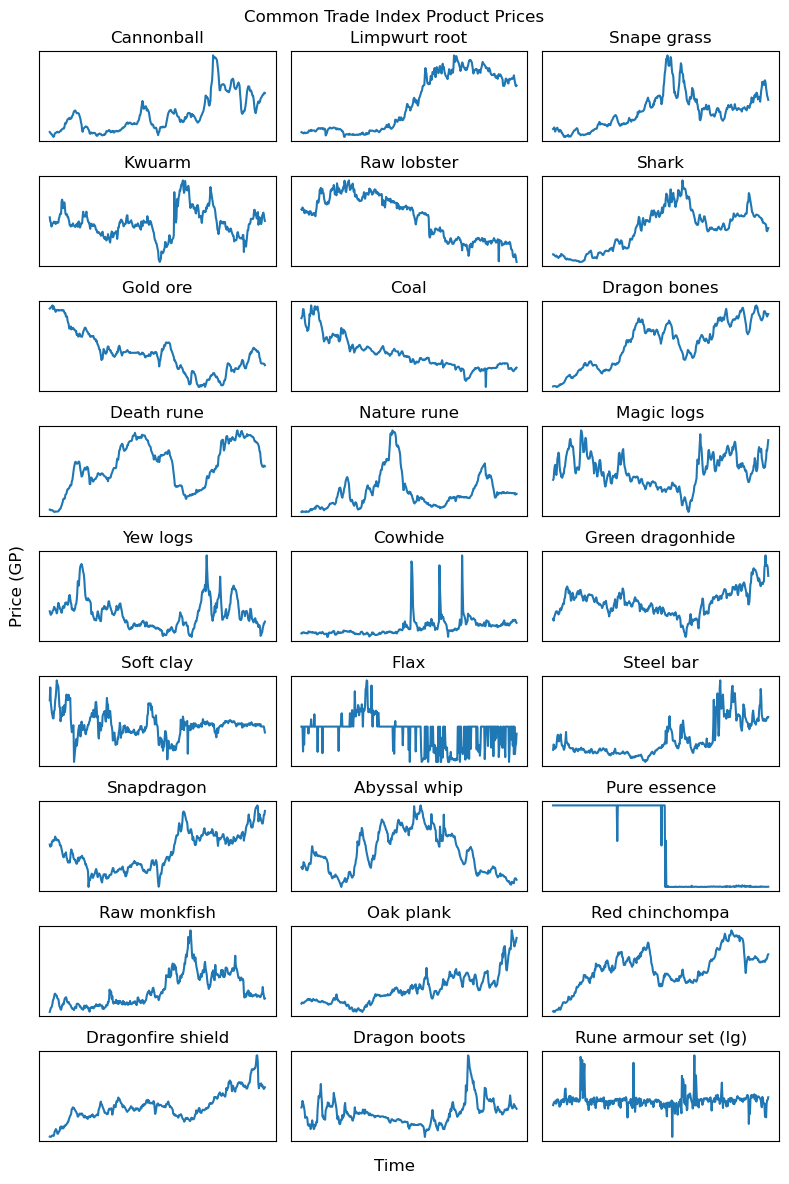

In [11]:
fig,axs = plt.subplots(9,3,figsize=(8,12))

ct = 0
for id_, new_df in df_CTI.groupby(by='id'):
    ax = axs[ct//3, ct%3]
    ax.tick_params(bottom=False)
    
    ax.plot(new_df.index.get_level_values(1),new_df['VWAP'])
    ax.set_title(item_name_from_id(id_))

    ct += 1


fig.supxlabel("Time")
fig.supylabel("Price (GP)")
fig.suptitle("Common Trade Index Product Prices")


plt.setp(axs, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

In [12]:
df_CTI['simpRet'] = (df_CTI['VWAP']/df_CTI.groupby('id')['VWAP'].shift(1)) - 1

df_CTI.groupby('id')['simpRet'].agg(nrow=lambda x:x.shape[0])

,nrow
id,
2,400
225,400
231,400
263,400
377,400
385,400
444,400
453,400
536,400


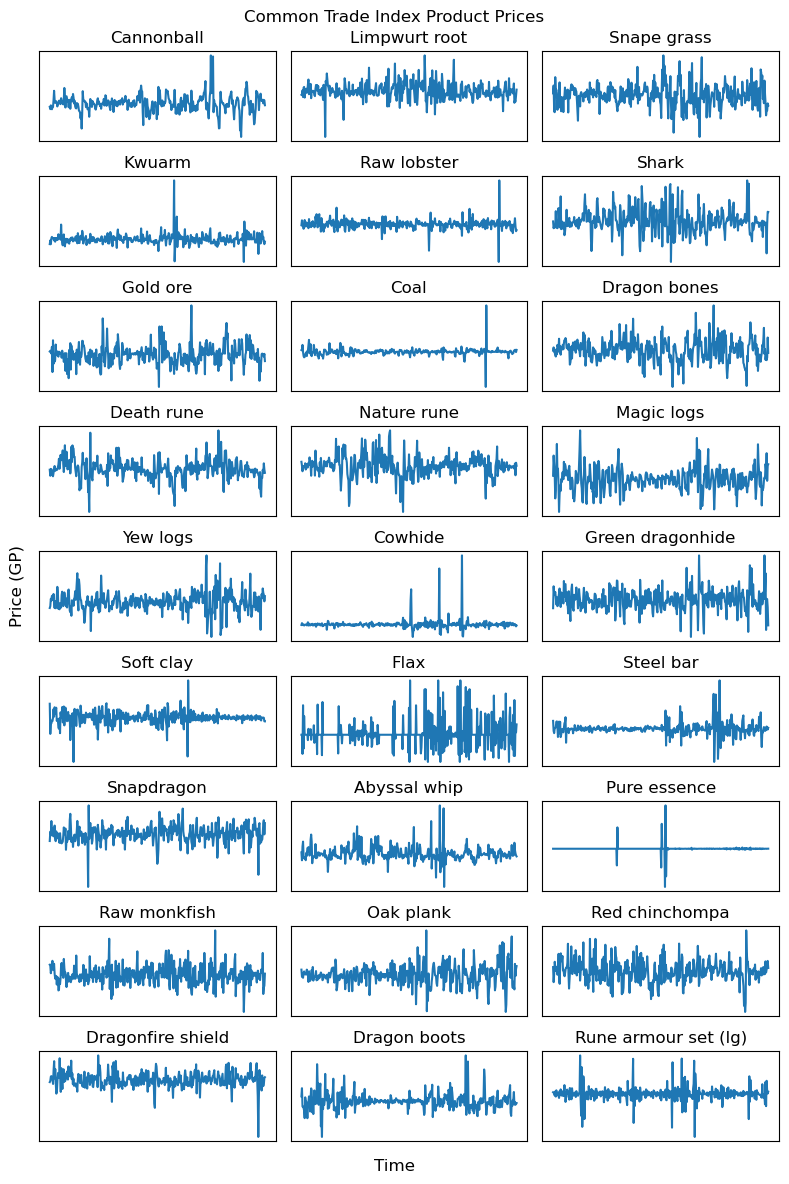

In [13]:
fig,axs = plt.subplots(9,3,figsize=(8,12))

ct = 0
for id, new_df in df_CTI.groupby(by='id'):
    ax = axs[ct//3, ct%3]
    ax.tick_params(bottom=False)
    
    ax.plot(new_df.index.get_level_values(1),new_df['simpRet'])
    ax.set_title(item_name_from_id(id))

    ct += 1


fig.supxlabel("Time")
fig.supylabel("Price (GP)")
fig.suptitle("Common Trade Index Product Prices")

plt.setp(axs, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

In [14]:
lret_vol = ((np.log(df_CTI.groupby('id')['VWAP'].shift(-1)/df_CTI['VWAP'])).groupby('id').std()
            *np.sqrt(365)).sort_values()

lret_vol.index = pd.Series(lret_vol.index.values).apply(item_name_from_id)
lret_vol

Gold ore               0.112
Snapdragon             0.196
Magic logs             0.267
Rune armour set (lg)   0.274
Dragon bones           0.298
Abyssal whip           0.318
Raw lobster            0.338
Green dragonhide       0.339
Dragon boots           0.340
Cannonball             0.355
Death rune             0.358
Oak plank              0.393
Nature rune            0.411
Dragonfire shield      0.442
Soft clay              0.458
Red chinchompa         0.465
Kwuarm                 0.522
Coal                   0.535
Yew logs               0.548
Shark                  0.560
Limpwurt root          0.577
Steel bar              0.689
Snape grass            0.695
Raw monkfish           0.773
Pure essence           1.035
Cowhide                2.099
Flax                   4.336
Name: VWAP, dtype: float64

In [15]:
sret_vol = df_CTI.groupby('id')['simpRet'].std()*np.sqrt(365)
notional_vol = sret_vol*df_CTI.groupby('id')['VWAP'].last()
last_px = df_CTI.groupby('id')['VWAP'].last()

df_tmp = pd.concat([sret_vol,notional_vol,last_px],axis=1)
df_tmp.columns = ['Vol','Notional Vol','Last Price']
df_tmp.index = pd.Series(df_tmp.index.values).apply(item_name_from_id)
display(df_tmp.sort_values(by='Notional Vol',ascending=False))

,Vol,Notional Vol,Last Price
Dragonfire shield,0.437,"1,793,466.295","4,106,377.205"
Abyssal whip,0.322,"434,734.506","1,349,402.881"
Dragon boots,0.343,"43,830.621","127,681.471"
Rune armour set (lg),0.273,"35,747.933","130,720.988"
Kwuarm,0.543,"1,983.151","3,649.374"
Snapdragon,0.195,"1,699.048","8,707.267"
Dragon bones,0.298,"1,255.689","4,210.518"
Red chinchompa,0.466,856.823,"1,837.901"
Cowhide,2.984,550.607,184.503
Green dragonhide,0.340,525.344,"1,545.139"


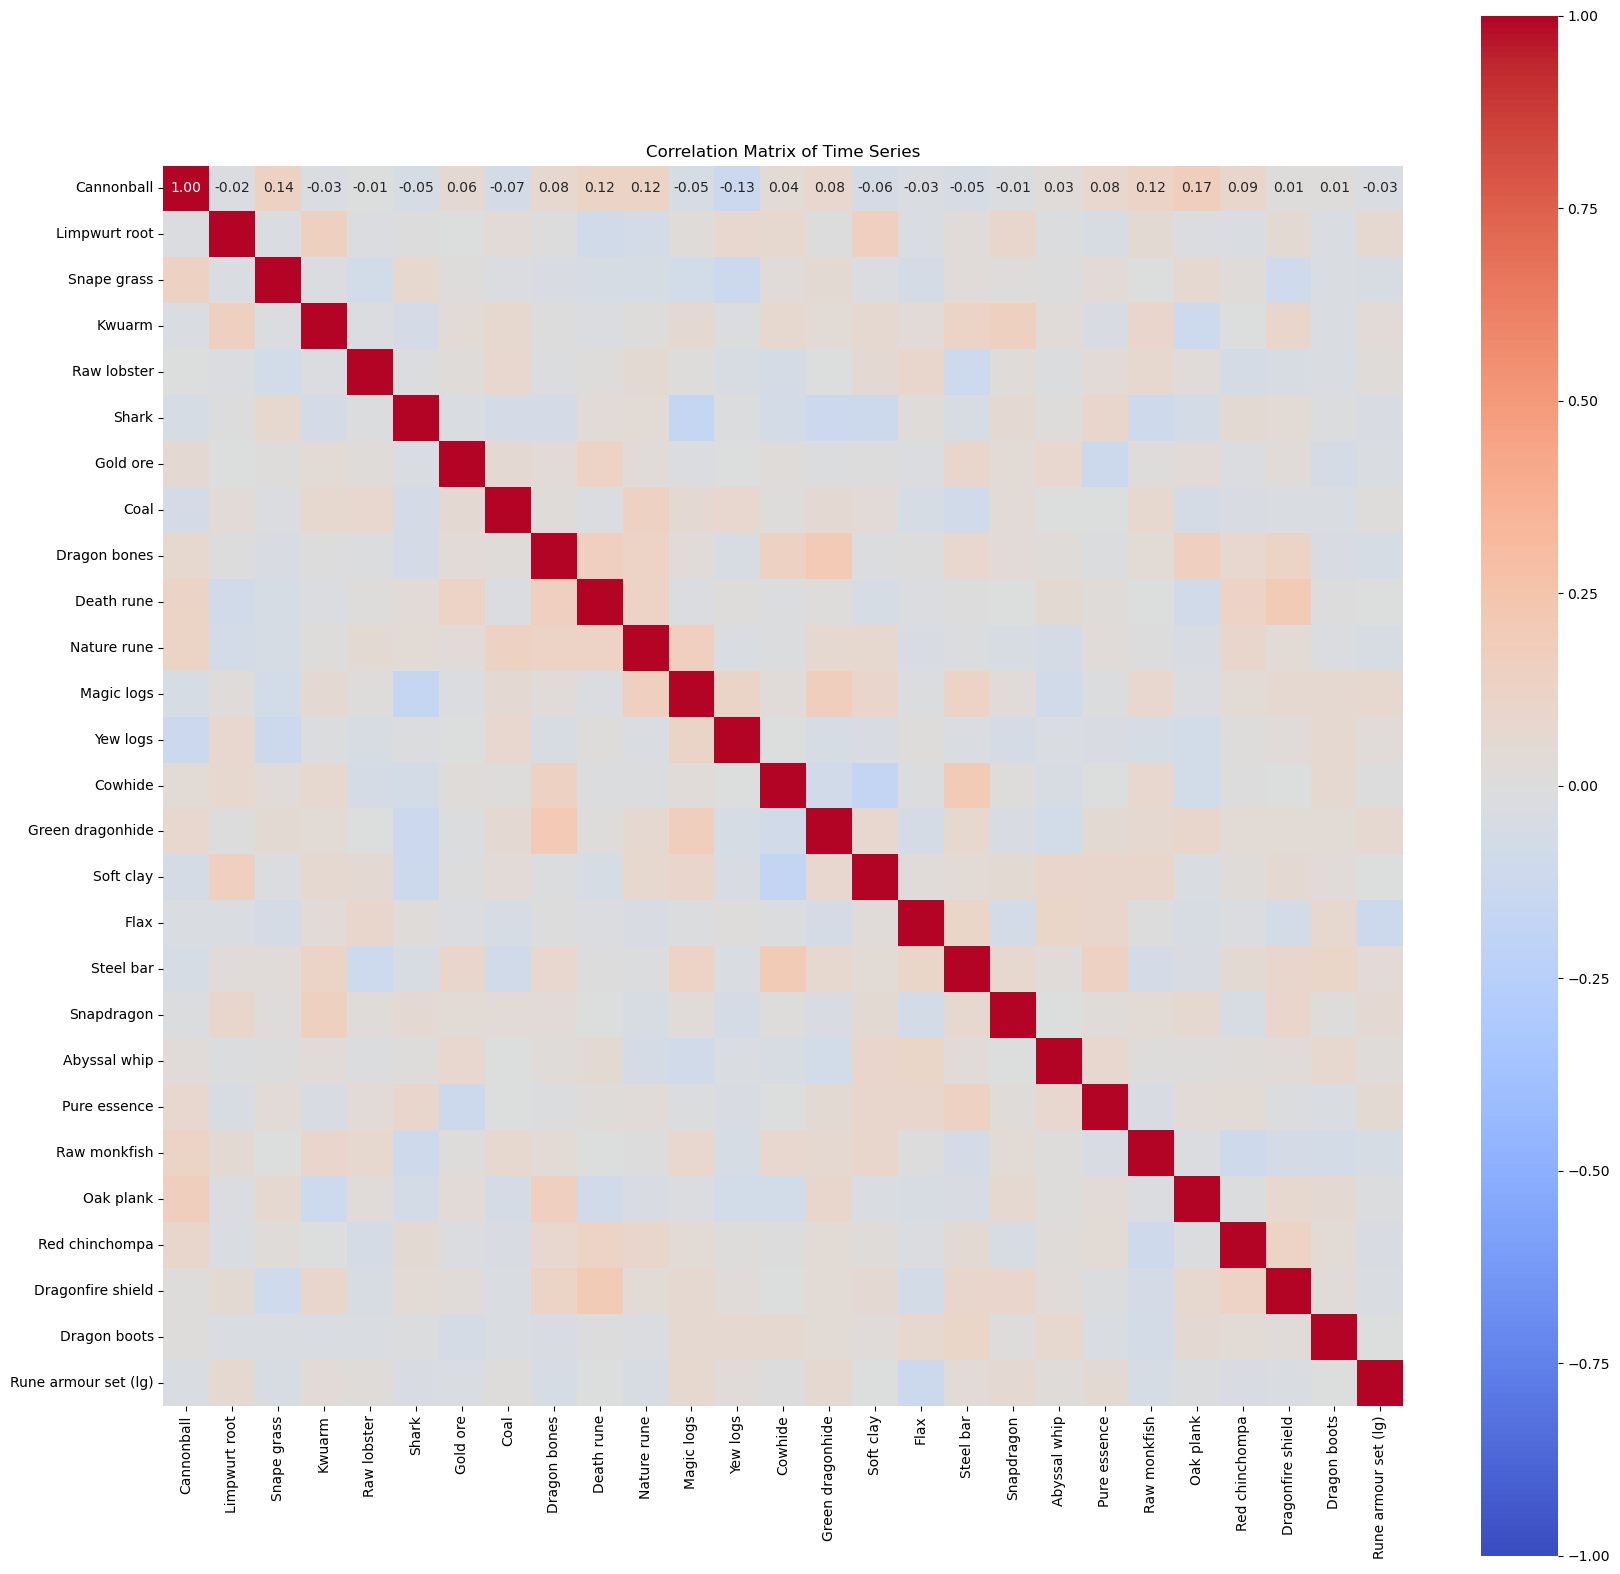

In [16]:
df_corr = pd.DataFrame()

for idx,df_select in df_CTI.groupby(level='id'):
    date_index = df_select.index.get_level_values(1)
    
    temp = pd.DataFrame(index = date_index)
    temp[idx] = df_select.loc[idx,'simpRet']

    df_corr = df_corr.join(temp,how='outer')

df_corr = df_corr.dropna()

corr_matrix = df_corr.rename(item_name_from_id,axis=1).corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',square=True,vmin=-1,vmax=1)

plt.title('Correlation Matrix of Time Series')
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

pd.reset_option('display.float_format')
adf_res = (df_CTI.dropna()).groupby(level=['id'])['simpRet'].agg(ADFtest = 
                                                                lambda x:adfuller(x)[1]<.05,
                                                               ADFtest_p_val =
                                                                lambda x:adfuller(x)[1])

adf_res = adf_res.rename(index=item_name_from_id)
adf_res.sort_values('ADFtest_p_val',ascending=False)

,ADFtest,ADFtest_p_val
id,,
Gold ore,True,4.587335e-10
Snape grass,True,4.052101e-10
Abyssal whip,True,1.922378e-10
Magic logs,True,3.256628e-11
Steel bar,True,1.635186e-11
Kwuarm,True,3.332044e-12
Green dragonhide,True,1.949754e-12
Death rune,True,3.359998e-13
Rune armour set (lg),True,4.078623e-16


# Beta

In [18]:
return_last_n_days(df_CTI,30)

,30_days_ret,name
id,,
560,-0.230011,Death rune
385,-0.192782,Shark
377,-0.134007,Raw lobster
225,-0.123391,Limpwurt root
7944,-0.114118,Raw monkfish
1779,-0.100017,Flax
453,-0.056540,Coal
2,-0.051268,Cannonball
4151,-0.041269,Abyssal whip


File read successfully for Master Files/items/master_file_11284_24h.csv


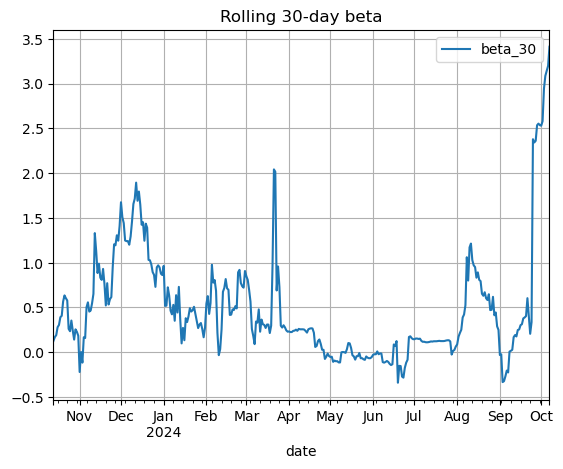

,beta_30
date,
2023-10-13,0.127484
2023-10-14,0.168795
2023-10-15,0.190430
2023-10-16,0.279042
2023-10-17,0.304671
...,...
2024-10-03,2.943196
2024-10-04,3.086387
2024-10-05,3.144300


In [27]:
rolling_betas(11284,plot=True)

In [20]:
compute_betas(df_CTI.loc[11284],30)

3.4048651207450202

In [21]:
compute_betas(df_CTI,30)

,beta_30,name
id,,
1779,-9.696291,Flax
11840,-0.541200,Dragon boots
1739,-0.482035,Cowhide
453,-0.080389,Coal
13024,-0.052870,Rune armour set (lg)
1761,-0.029224,Soft clay
444,-0.004205,Gold ore
7936,0.000480,Pure essence
377,0.011923,Raw lobster


---

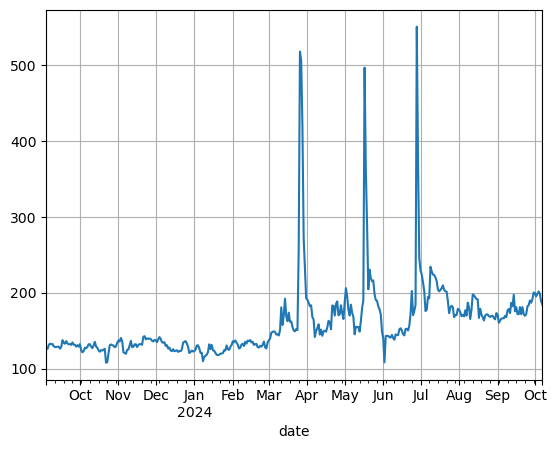

In [22]:
df_CTI.loc[1739]['VWAP'].plot()
plt.grid()
plt.show()

---

In [26]:
date1 = '2024-08-10'
date2 = '2024-09-10'

fltr = (df_CTI.index.get_level_values(1) >= date1) & (df_CTI.index.get_level_values(1) <= date2)
last_n_df = df_CTI.loc[fltr]

last_n_ret = last_n_df.groupby('id')['VWAP'].agg(ret = lambda x:x.iloc[-1]/
                                                       x.iloc[0] - 1).sort_values(by='ret')
# pure essence numbers are bad
last_n_ret = last_n_ret.dropna()

last_n_df['ttlVolume'] = last_n_df['highPriceVolume'] + last_n_df['lowPriceVolume']
last_n_df['norm_ttlVolume']=last_n_df['ttlVolume']/last_n_df.groupby('id')['ttlVolume'].transform('first')

last_n_df['norm_VWAP']=last_n_df['VWAP']/(last_n_df.groupby('id')['VWAP'].transform('first'))

return_between(df_CTI,date1,date2)

/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_81643/175820045.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_n_df['ttlVolume'] = last_n_df['highPriceVolume'] + last_n_df['lowPriceVolume']
/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_81643/175820045.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_n_df['norm_ttlVolume']=last_n_df['ttlVolume']/last_n_df.groupby('id')['ttlVolume'].transform('first')
/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_81643/

,ret,name
id,,
7944,-0.261473,Raw monkfish
561,-0.222540,Nature rune
10034,-0.197235,Red chinchompa
1515,-0.165570,Yew logs
11840,-0.135847,Dragon boots
225,-0.120801,Limpwurt root
2,-0.071308,Cannonball
377,-0.024347,Raw lobster
4151,-0.014624,Abyssal whip


we can ignore flax because it only really trades at 1 or 2 gp.

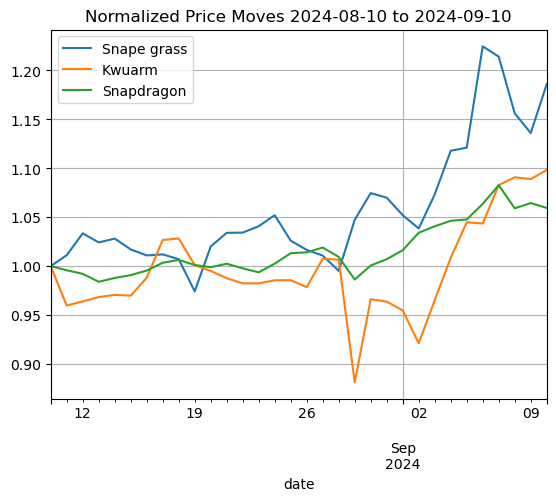

In [25]:
last_n_df.loc[231,'norm_VWAP'].plot(label=item_name_from_id(231))
last_n_df.loc[263,'norm_VWAP'].plot(label=item_name_from_id(263))
last_n_df.loc[3000,'norm_VWAP'].plot(label=item_name_from_id(3000))
plt.legend()
plt.grid()
plt.title('Normalized Price Moves {0} to {1}'.format(last_n_df.index.get_level_values(1).min().strftime('%Y-%m-%d'),
                                                    last_n_df.index.get_level_values(1).max().strftime('%Y-%m-%d')))
plt.show()